# Use Pandas to Sort event arrivals csv files 
## according to max SNR value

##  Fei Zhang
### 2018-07-26

In [1]:
SOURCE_LATITUDE = 'source_latitude'
SOURCE_LONGITUDE = 'source_longitude'
STATION_LATITUDE = 'station_latitude'
STATION_LONGITUDE = 'station_longitude'
STATION_CODE = 'station_code'
FREQUENCY = 'no_of_summary_rays'

column_names = ['source_block', 'station_block',
                'residual', 'event_number',
                SOURCE_LONGITUDE, SOURCE_LATITUDE,
                'source_depth', STATION_LONGITUDE, STATION_LATITUDE,
                'observed_tt', 'station_arrive_time', 'event_origin_time', 'ellipcorr','locations2degrees', STATION_CODE, 'SNR', 'P_or_S']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from seismic.cluster.cluster import Grid2 

/g/data1a/ha3/fxz547/Githubz/passive-seismic/seismic/cluster/cluster.py:22: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/g/data1a/ha3/fxz547/miniconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/g/data1a/ha3/fxz547/miniconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/g/data1a/ha3/fxz547/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/g/data1a/ha3/fxz547/miniconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/g/data1a/ha3/fxz547/miniconda3/lib/python3.6/site-packages/

In [3]:
!pwd


/g/data1a/ha3/fxz547/Githubz/passive-seismic/notebooks


In [4]:
grid=Grid2()


In [5]:
grid.REGION_MAX_BN

31181761

In [6]:
grid.rmeters

array([      0,   10000,   35000,   70000,  110000,  160000,  210000,
        260000,  310000,  360000,  410000,  460000,  510000,  560000,
        610000,  660000,  710000,  810000,  910000, 1010000, 1110000,
       1250000, 1400000, 1600000])

In [7]:
grid.gmeters

array([      0,  110000,  280000,  410000,  660000,  840000, 1020000,
       1250000, 1400000, 1600000, 1850000, 2050000, 2250000, 2450000,
       2600000, 2750000, 2889000])

In [8]:
grid.is_point_in_region(-53.2, -171)

True

In [9]:
grid.is_point_in_region(-53.2, -171+360)

True

In [10]:
-171+360

189

In [11]:
grid.is_point_in_region(-0.01, 100)

True

In [12]:
print (round(90.0 /0.25) + 1)  # (90/0.25)

361


In [13]:
print (round(54.0 /0.25) + 1)  # 54/0.25

217


In [14]:
360*216

77760

In [15]:
(31181761-1)/77760

401.0

In [16]:
k = round(2000000.0 / grid.dz) + 1  # assume 2000KM max depth
print(k)

401


In [17]:
round(2/4.5,2)

0.44

In [50]:

# P wave
#inputcsv='/g/data/ha3/fxz547/Githubz/passive-seismic/seismic_events_arrivals_P_0.csv'
#inputcsv='/g/data/ha3/fxz547/Githubz/passive-seismic/tempworks/outfile_P.csv'
inputcsv='/g/data/ha3/fxz547/travel_time_tomography/CSV_NewFormatAug10/FZ01-pst-cluster2/run3/P.csv'
residual_cutoff=5.0
sortedfile='sortedfile_P.csv'
sortedfile2= 'sortedfile2_P.csv'

# for S wave
#inputcsv='/g/data1a/ha3/fxz547/travel_time_tomography/run5_events_1deg/outfile_S.csv'
inputcsv='/g/data/ha3/fxz547/travel_time_tomography/CSV_NewFormatAug10/FZ01-pst-cluster2/run3/S.csv'
residual_cutoff=10.0
sortedfile='sortedfile_S.csv'
sortedfile2= 'sortedfile2_S.csv'

In [ ]:
import logging
import sys
logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.DEBUG, stream=sys.stdout)

log =logging.getLogger()
log.info('Hello world!')

# def sort(output_file, sorted_file, residual_cutoff):
def sort2(output_file, sorted_file, residual_cutoff):
    """
    Sort and filter the arrivals.

    Sort based on the source and station block number.
    There are two stages of filtering:
    1. Filter based on the time residual
    2. Filter based on best Signal_to_Noise-Ratio seismic wave: If there are multiple source and station block combinations, we keep the
    row corresponding to the highest SNR value

    cmdline usage:
    cluster sort outfile_P.csv 5. -s sorted_P.csv
    cluster sort outfile_S.csv 10. -s sorted_S.csv


    :param output_file: output file from the gather stage (eg, outfile_P.csv)
    :param sorted_file: str, optional
        optional sorted output file path. Default: sorted.csv.
    :param residual_cutoff: float
        residual seconds above which arrivals are rejected.
    :return: pandas_df
    """

    print('Filtering arrivals.')

    cluster_data = pd.read_csv(output_file, header=None,  names=column_names)
    ##cluster_data = pd.read_csv(output_file, header=1)
    
    log.debug("Number of records in initial CSV file = %s", cluster_data.shape[0])
    
    cluster_data = cluster_data[abs(cluster_data['residual'])
                                < residual_cutoff]
    
    log.debug("Number of records after residual cutoff = %s", cluster_data.shape[0])
    
    cluster_data['source_depth'] = cluster_data['source_depth'] / 1000.0  # convert to KM?
    
    # groupby sorts by default
    # cluster_data.sort_values(by=['source_block', 'station_block'],
    #                          inplace=True)

    log.info('Sorting arrivals.')

    # groupby automatically sorts
#     med = cluster_data.groupby(
#         by=['source_block', 'station_block']
#         )['observed_tt'].quantile(q=.5, interpolation='lower').reset_index() # use a seq index:0,1,2,....

#  SNR value max
    med = cluster_data.groupby(
        by=['source_block', 'station_block']
        )['SNR'].max().reset_index() # use a seq index:0,1,2,.
    
    # med dataframe has three columns:  [source_block, station_block ,observed_tt]
    
    final_df = pd.merge(cluster_data, med, how='right',
                        on=['source_block', 'station_block', 'SNR'],
                        sort=True,
                        right_index=True)

    # Confirmed: drop_duplicates required due to possibly duplicated picks in
    #  the original engdahl events
    # refer: https://github.com/GeoscienceAustralia/passive-seismic/issues/51
    # The subset is specified as we have some stations that are very close?
    
    log.debug("Number of records before drop_duplicates = %s", final_df.shape[0])
    
    final_df.drop_duplicates(subset=['source_block', 'station_block'],
                             keep='first',  inplace=True)

    final_df.to_csv(sorted_file, header=False, index=False, sep=',')
    
    log.debug("Number of records in final pdf = %s", final_df.shape[0])
    return final_df


In [51]:
finalpdf = sort2(inputcsv,sortedfile,residual_cutoff)

Filtering arrivals.
2018-08-21 10:01:59,313 | DEBUG : Number of records in initial CSV file = 44542
2018-08-21 10:01:59,318 | DEBUG : Number of records after residual cutoff = 39077
2018-08-21 10:01:59,381 | INFO : Sorting arrivals.
2018-08-21 10:01:59,503 | DEBUG : Number of records before drop_duplicates = 32617
2018-08-21 10:02:00,237 | DEBUG : Number of records in final pdf = 32267


In [52]:
finalpdf.shape

(32267, 17)

In [53]:
finalpdf.head()

,source_block,station_block,residual,event_number,source_longitude,source_latitude,source_depth,station_longitude,station_latitude,observed_tt,station_arrive_time,event_origin_time,ellipcorr,locations2degrees,station_code,SNR,P_or_S
27315,130849,148486,2.300000,1232063914,131.9911,-0.4827,0.0,131.1327,-12.8436,319.303314,2009-01-16T00:03:54.896683Z,2009-01-15T23:58:34.910000Z,-0.683369,12.390151,MTN,3.171184,2
26931,130852,148491,-4.650000,1246259593,132.7981,-0.5568,0.0,132.4727,-12.6869,306.108754,2009-06-29T07:18:20.010137Z,2009-06-29T07:13:13.230000Z,-0.671383,12.134389,KDU,1.654873,2
42750,131214,148491,-5.600000,1295024131,133.1753,-0.6986,0.0,132.4727,-12.6869,302.083978,2011-01-14T17:00:33.944804Z,2011-01-14T16:55:31.195000Z,-0.665826,12.008515,KDU,4.199065,2
37820,131534,31205455,-1.400000,1426242394,123.2911,-1.0046,0.0,96.8349,-12.1901,644.439879,2015-03-13T10:37:20.309378Z,2015-03-13T10:26:34.690000Z,-1.179499,28.519279,COCO,4.052341,2
19374,131999,158986,5.978535,846819149,149.5629,-1.3062,0.4,146.2500,-20.0876,491.677017,1996-11-01T03:40:42.271567Z,1996-11-01T03:32:29.610000Z,-0.984550,19.058666,CTA,2.132021,2


In [54]:
grid.find_block_number(0.3262,101.04,0)

2018-08-21 10:02:00,280 | DEBUG : (0.3262, 101.04) NOT in the region 


31202579

In [55]:
grid.find_block_number(-0.1757,100.7719,0)

2018-08-21 10:02:00,288 | DEBUG : (-0.1757, 100.7719) in the region


130364

In [56]:
#sort again
pdf2=sort2(sortedfile, sortedfile2, residual_cutoff )

Filtering arrivals.
2018-08-21 10:02:00,434 | DEBUG : Number of records in initial CSV file = 32267
2018-08-21 10:02:00,441 | DEBUG : Number of records after residual cutoff = 32267
2018-08-21 10:02:00,442 | INFO : Sorting arrivals.
2018-08-21 10:02:00,548 | DEBUG : Number of records before drop_duplicates = 32267
2018-08-21 10:02:01,263 | DEBUG : Number of records in final pdf = 32267


In [57]:
pdf2.head()

,source_block,station_block,residual,event_number,source_longitude,source_latitude,source_depth,station_longitude,station_latitude,observed_tt,station_arrive_time,event_origin_time,ellipcorr,locations2degrees,station_code,SNR,P_or_S
0,130849,148486,2.300000,1232063914,131.9911,-0.4827,0.0000,131.1327,-12.8436,319.303314,2009-01-16T00:03:54.896683Z,2009-01-15T23:58:34.910000Z,-0.683369,12.390151,MTN,3.171184,2
1,130852,148491,-4.650000,1246259593,132.7981,-0.5568,0.0000,132.4727,-12.6869,306.108754,2009-06-29T07:18:20.010137Z,2009-06-29T07:13:13.230000Z,-0.671383,12.134389,KDU,1.654873,2
2,131214,148491,-5.600000,1295024131,133.1753,-0.6986,0.0000,132.4727,-12.6869,302.083978,2011-01-14T17:00:33.944804Z,2011-01-14T16:55:31.195000Z,-0.665826,12.008515,KDU,4.199065,2
3,131534,31205455,-1.400000,1426242394,123.2911,-1.0046,0.0000,96.8349,-12.1901,644.439879,2015-03-13T10:37:20.309378Z,2015-03-13T10:26:34.690000Z,-1.179499,28.519279,COCO,4.052341,2
4,131999,158986,5.978535,846819149,149.5629,-1.3062,0.0004,146.2500,-20.0876,491.677017,1996-11-01T03:40:42.271567Z,1996-11-01T03:32:29.610000Z,-0.984550,19.058666,CTA,2.132021,2


In [58]:
pdf2.shape

(32267, 17)

<Figure size 432x288 with 0 Axes>

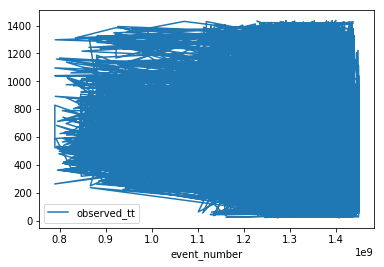

In [59]:
plt.figure(); pdf2.plot(x='event_number', y='observed_tt')
# plt.figure(); pdf2.plot(x='event_number', y='source_depth')
# plt.figure(); pdf2.plot(x='event_number', y='locations2degrees')
# plt.figure(); pdf2.plot(x='event_number', y='residual')  # less than +-10s



<Figure size 432x288 with 0 Axes>

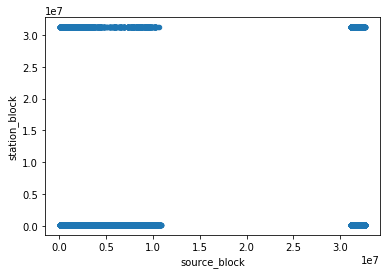

In [60]:
plt.figure(); pdf2.plot.scatter(x='source_block', y='station_block')

<Figure size 432x288 with 0 Axes>

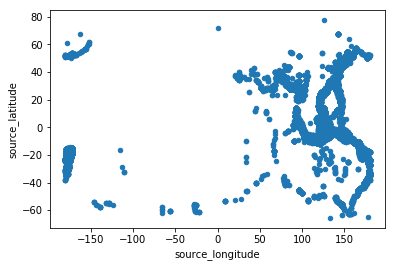

In [61]:
plt.figure(); pdf2.plot.scatter(x='source_longitude', y='source_latitude')

<Figure size 432x288 with 0 Axes>

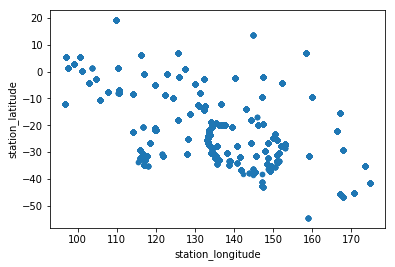

In [62]:
plt.figure(); pdf2.plot.scatter(x='station_longitude', y='station_latitude')

<Figure size 432x288 with 0 Axes>

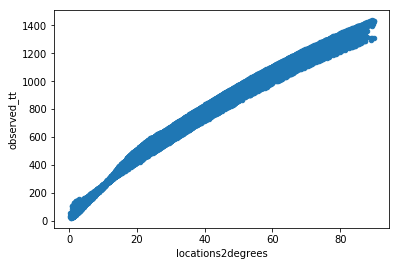

In [63]:
plt.figure(); pdf2.plot.scatter(x='locations2degrees', y='observed_tt')

<Figure size 432x288 with 0 Axes>

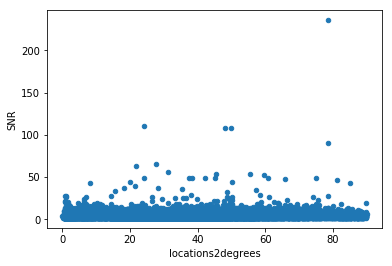

In [64]:
plt.figure(); pdf2.plot.scatter(x='locations2degrees', y='SNR')

In [65]:
 med = pdf2.groupby(by=['source_block', 'station_block'])[
        'observed_tt'].quantile(q=.5, interpolation='lower').reset_index()

In [66]:
med.head()

,source_block,station_block,observed_tt
0,130849,148486,319.303314
1,130852,148491,306.108754
2,131214,148491,302.083978
3,131534,31205455,644.439879
4,131999,158986,491.677017


In [67]:
med.shape

(32267, 3)

In [68]:
med2 = pdf2.groupby(
        by=['source_block', 'station_block'] )['SNR'].max().reset_index() # use a seq index:0,1,2,.

In [69]:
med2.head()

,source_block,station_block,SNR
0,130849,148486,3.171184
1,130852,148491,1.654873
2,131214,148491,4.199065
3,131534,31205455,4.052341
4,131999,158986,2.132021


In [70]:
med2.shape

(32267, 3)

In [71]:
pdf2.loc[2]

source_block                                131214
station_block                               148491
residual                                      -5.6
event_number                            1295024131
source_longitude                           133.175
source_latitude                            -0.6986
source_depth                                     0
station_longitude                          132.473
station_latitude                          -12.6869
observed_tt                                302.084
station_arrive_time    2011-01-14T17:00:33.944804Z
event_origin_time      2011-01-14T16:55:31.195000Z
ellipcorr                                -0.665826
locations2degrees                          12.0085
station_code                                   KDU
SNR                                        4.19906
P_or_S                                           2
Name: 2, dtype: object

In [72]:
pdf2.iloc[1]

source_block                                130852
station_block                               148491
residual                                     -4.65
event_number                            1246259593
source_longitude                           132.798
source_latitude                            -0.5568
source_depth                                     0
station_longitude                          132.473
station_latitude                          -12.6869
observed_tt                                306.109
station_arrive_time    2009-06-29T07:18:20.010137Z
event_origin_time      2009-06-29T07:13:13.230000Z
ellipcorr                                -0.671383
locations2degrees                          12.1344
station_code                                   KDU
SNR                                        1.65487
P_or_S                                           2
Name: 1, dtype: object

In [73]:
pdf2.describe()

,source_block,station_block,residual,event_number,source_longitude,source_latitude,source_depth,station_longitude,station_latitude,observed_tt,ellipcorr,locations2degrees,SNR,P_or_S
count,3.226700e+04,3.226700e+04,32267.000000,3.226700e+04,32267.000000,32267.000000,32267.000000,32267.000000,32267.000000,32267.000000,32267.000000,32267.000000,32267.000000,32267.0
mean,1.106498e+07,3.757193e+06,0.688082,1.322701e+09,98.077423,-3.160349,0.158156,131.608327,-17.414775,675.343709,-0.693454,34.156261,3.746247,2.0
std,1.327823e+07,9.937413e+06,4.074176,9.584563e+07,108.591285,20.063262,0.188440,15.034712,12.100339,322.625837,0.403331,20.420453,2.967938,0.0
min,1.308490e+05,1.315090e+05,-9.999674,7.889878e+08,-179.996200,-65.693000,0.000000,96.834900,-54.498600,20.267607,-1.336219,0.068615,1.500009,2.0
25%,8.397530e+05,1.503340e+05,-1.950000,1.275336e+09,118.856050,-14.656700,0.031134,122.237602,-26.489000,489.939182,-1.034990,20.049792,2.382607,2.0
50%,2.873470e+06,1.614000e+05,0.450000,1.338925e+09,132.519900,-6.359200,0.064861,133.111100,-19.942753,666.845196,-0.805774,31.899990,3.142472,2.0
75%,3.123573e+07,1.750890e+05,3.450000,1.391762e+09,154.213400,1.722000,0.198402,143.174900,-8.470200,896.525450,-0.374668,47.156539,4.336026,2.0
max,3.260632e+07,3.121530e+07,10.000000,1.450741e+09,179.994500,77.398500,0.692061,174.704300,19.029100,1437.094900,0.968138,89.977257,235.808165,2.0


In [74]:
pdf2.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            32257, 32258, 32259, 32260, 32261, 32262, 32263, 32264, 32265,
            32266],
           dtype='int64', length=32267)

In [75]:
pdf2.index=pdf2.event_number

In [76]:
pdf2.index

Int64Index([1232063914, 1246259593, 1295024131, 1426242394,  846819149,
            1317320470, 1370006517, 1375911843, 1378218601, 1343002924,
            ...
            1432984982, 1432984982, 1432984982, 1432984982, 1432984982,
            1432984982, 1432984982, 1432984982, 1432984982, 1432984982],
           dtype='int64', name='event_number', length=32267)

In [77]:
pdf2.tail(n=5)

,source_block,station_block,residual,event_number,source_longitude,source_latitude,source_depth,station_longitude,station_latitude,observed_tt,station_arrive_time,event_origin_time,ellipcorr,locations2degrees,station_code,SNR,P_or_S
event_number,,,,,,,,,,,,,,,,,
1432984982,32606322,31202001,2.90,1432984982,140.4939,27.8281,0.685455,98.923700,2.6938,819.746399,2015-05-30T11:36:42.687217Z,2015-05-30T11:23:02.850000Z,-0.090818,46.934750,PSI,8.959045,2
1432984982,32606322,31202288,1.25,1432984982,140.4939,27.8281,0.685455,97.575500,1.3039,844.099789,2015-05-30T11:37:07.016591Z,2015-05-30T11:23:02.850000Z,-0.066802,48.845823,GSI,2.992600,2
1432984982,32606322,31202312,-1.10,1432984982,140.4939,27.8281,0.685455,127.366699,0.7718,568.003507,2015-05-30T11:32:30.885531Z,2015-05-30T11:23:02.850000Z,-0.032025,29.836069,TNTI,6.134965,2
1432984982,32606322,31202579,3.40,1432984982,140.4939,27.8281,0.685455,101.039597,0.3262,817.421657,2015-05-30T11:36:40.332916Z,2015-05-30T11:23:02.850000Z,-0.061259,46.726402,BKNI,3.142516,2
1432984982,32606322,31215297,-0.05,1432984982,140.4939,27.8281,0.685455,158.956100,-54.4986,1249.037451,2015-05-30T11:43:52.365012Z,2015-05-30T11:23:02.850000Z,-0.477561,83.852251,MCQ,10.657603,2


In [78]:
pdf2.iloc[1]  # now .loc[2] does not work

source_block                                130852
station_block                               148491
residual                                     -4.65
event_number                            1246259593
source_longitude                           132.798
source_latitude                            -0.5568
source_depth                                     0
station_longitude                          132.473
station_latitude                          -12.6869
observed_tt                                306.109
station_arrive_time    2009-06-29T07:18:20.010137Z
event_origin_time      2009-06-29T07:13:13.230000Z
ellipcorr                                -0.671383
locations2degrees                          12.1344
station_code                                   KDU
SNR                                        1.65487
P_or_S                                           2
Name: 1246259593, dtype: object

In [79]:
#pdf2.loc[215]